In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import ttest_ind

**DATA LOAD**

In [2]:
df=pd.read_csv("gender_submission.csv")
df=pd.read_csv("test.csv")
df=pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.60,C2,S
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.10,NaN,S
575,576,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.50,NaN,S
782,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.00,D6,S
407,408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.75,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.size

10692

**DATA CLEANING**

In [8]:
# Check for missing values
df.isnull().sum()

# Handle missing values (e.g., fill with mean, median, or mode, or drop rows/columns)
# Example: Fill missing age values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Check for duplicate rows
df.duplicated().sum()

# Remove duplicate rows if necessary
df.drop_duplicates(inplace=True)

# Explore data types
df.dtypes

# Convert data types if needed (e.g., string to numeric)
# Example: Convert 'Fare' to integer
# df['Fare'] = df['Fare'].astype(int)

# Identify and handle outliers
# Example: Using boxplots to visualize outliers in 'Fare'
# sns.boxplot(x=df['Fare'])
# plt.show()

# Remove or replace outliers based on your analysis
# Example: Remove rows where 'Fare' is greater than a certain threshold
# df = df[df['Fare'] < 300]

# Check for inconsistent data (e.g., spelling variations)
# Example: Check for inconsistencies in 'Sex' column
# df['Sex'].unique()

# Correct inconsistencies if needed
# Example: Replace 'mal' with 'male' in 'Sex' column
# df['Sex'] = df['Sex'].replace('mal', 'male')

# Explore and clean specific columns based on your understanding of the data
# Example: Explore 'Embarked' column
# df['Embarked'].value_counts()

# Handle missing values in 'Embarked' (e.g., fill with the most frequent value)
# df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Further data cleaning steps can be added based on your specific dataset and analysis goals.

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [9]:
# Convert 'Fare' to integer
df['Fare'] = df['Fare'].astype(int)

# Convert 'Age' to integer
df['Age'] = df['Age'].astype(int)

In [10]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47,0,0,345765,9,NaN,S
218,219,1,1,"Bazzani, Miss. Albina",female,32,0,0,11813,76,D15,C
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34,0,0,2683,6,NaN,C
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47,0,0,110465,52,C110,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31,1,0,345763,18,NaN,S


In [11]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,int64
SibSp,int64
Parch,int64
Ticket,object
Fare,int64


In [12]:
# prompt: drop column Parch, Sib Sp ,Cabin

# Drop columns 'Parch', 'SibSp', and 'Cabin'
df = df.drop(['Parch', 'SibSp', 'Cabin'], axis=1)

In [13]:
df = df.rename(columns={'Embarked': 'target'})

In [14]:
print(df['target'].unique())

['S' 'C' 'Q' nan]


In [15]:
print(df['target'].isnull().sum())

2


In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(889, 9)

In [18]:
df.dropna(subset=['target'], inplace=True)

In [19]:
df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,target
808,809,0,2,"Meyer, Mr. August",male,39,248723,13,S
289,290,1,3,"Connolly, Miss. Kate",female,22,370373,7,Q
269,270,1,1,"Bissette, Miss. Amelia",female,35,PC 17760,135,S
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21,312992,7,S


In [20]:
print(df['target'].unique())

['S' 'C' 'Q']


In [21]:
df.shape

(889, 9)

**EDA**




In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.299213,31.677165
std,256.998173,0.486260,0.834700,12.993433,49.706915
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,7.000000
50%,446.000000,0.000000,3.000000,28.000000,14.000000
75%,668.000000,1.000000,3.000000,35.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.000000


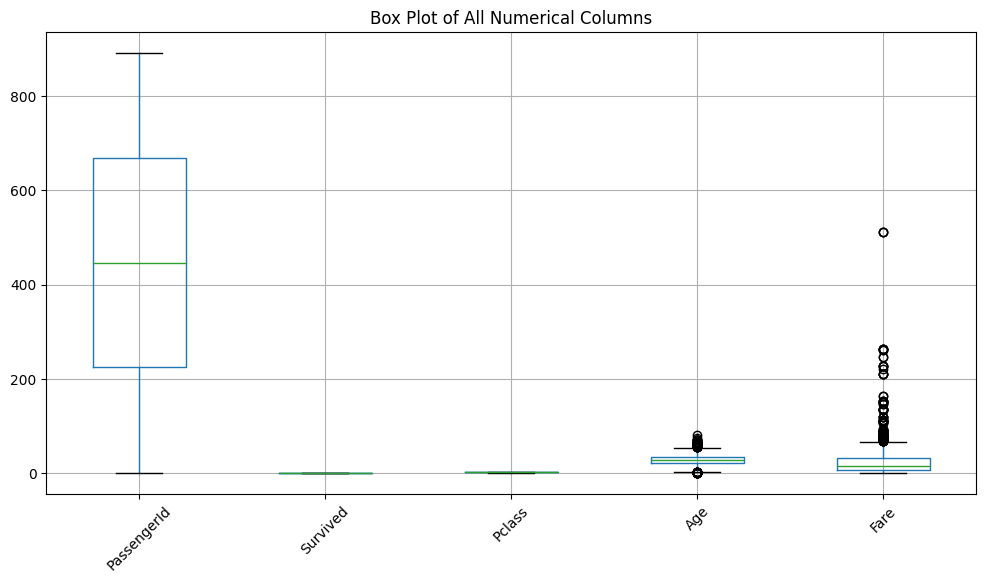

In [23]:
# Box plot for all numerical columns
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title("Box Plot of All Numerical Columns")
plt.xticks(rotation=45)
plt.show()

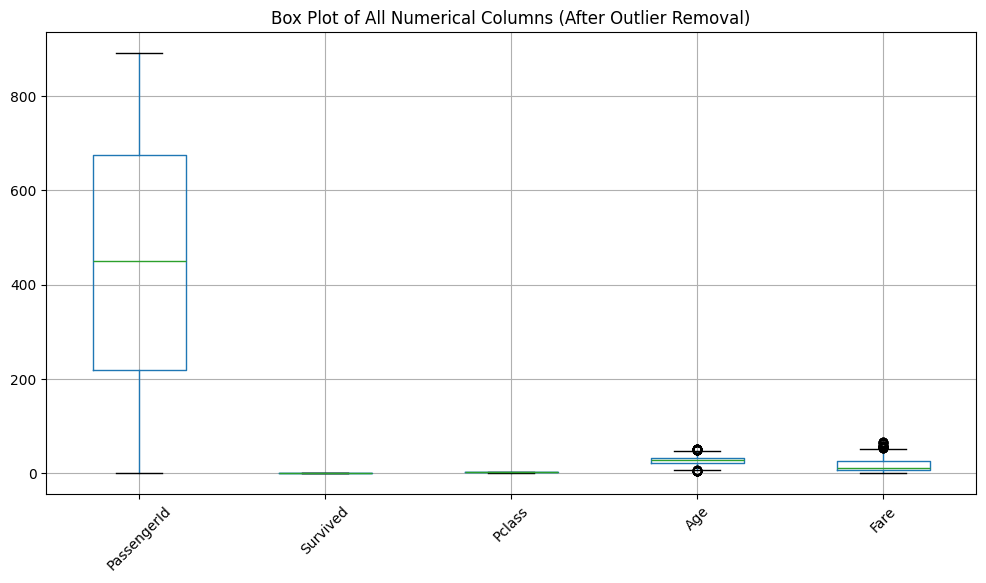

In [24]:
# prompt: remove outliers

# Identify outliers using IQR for 'Fare' and 'Age'
for column in ['Fare', 'Age']:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Remove outliers
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Box plot after removing outliers
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title("Box Plot of All Numerical Columns (After Outlier Removal)")
plt.xticks(rotation=45)
plt.show()

In [26]:
# prompt: drop column sibsp and parch

# Check if columns exist before dropping
if 'SibSp' in df.columns and 'Parch' in df.columns:
  df = df.drop(['SibSp', 'Parch'], axis=1)
else:
  print("Columns 'SibSp' and/or 'Parch' not found in DataFrame.")

Columns 'SibSp' and/or 'Parch' not found in DataFrame.


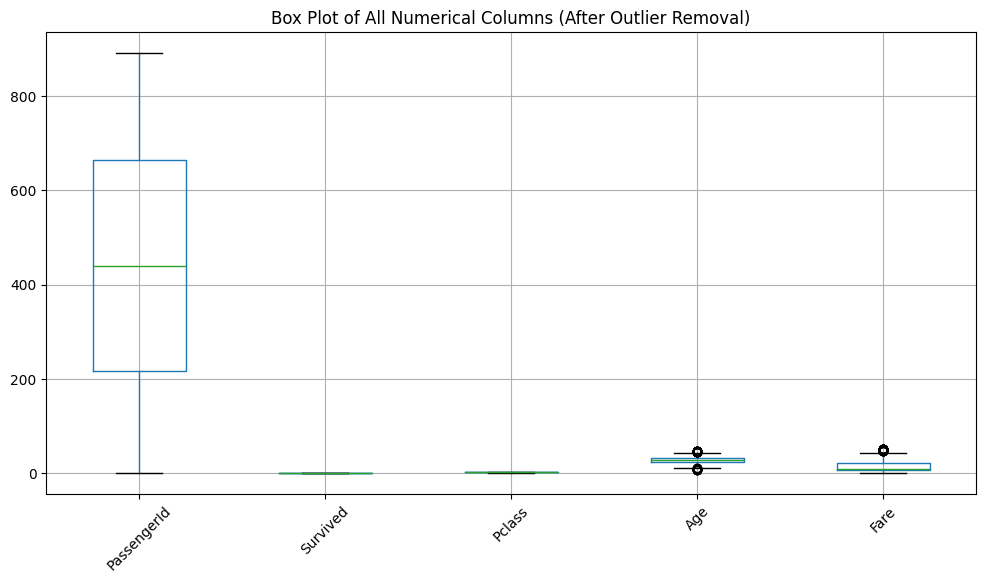

In [27]:
# prompt: remove outliers

# Identify outliers using IQR for 'Fare' and 'Age'
for column in ['Fare', 'Age']:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Remove outliers
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Box plot after removing outliers
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title("Box Plot of All Numerical Columns (After Outlier Removal)")
plt.xticks(rotation=45)
plt.show()

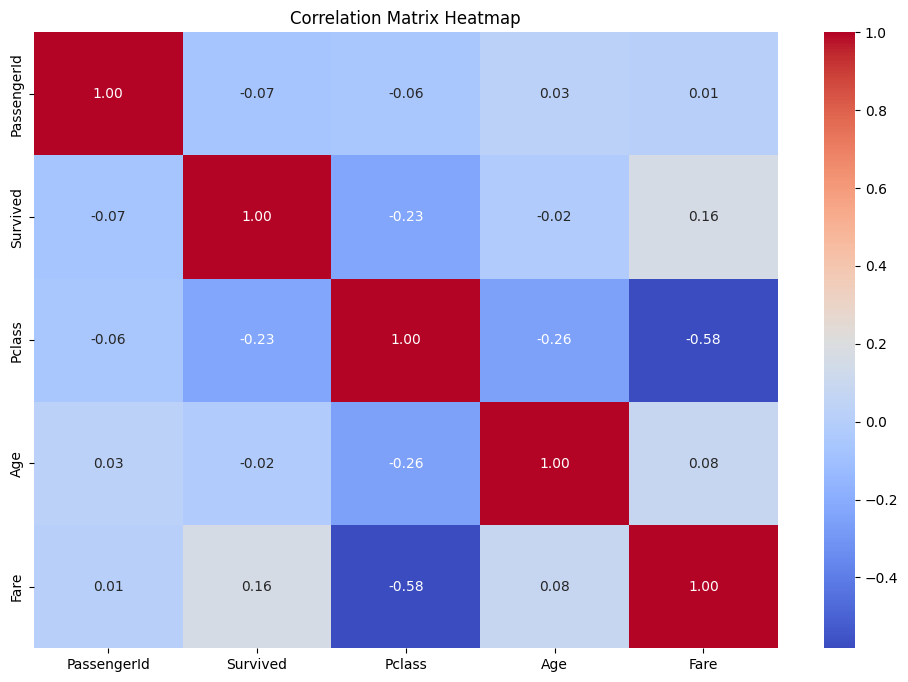

In [28]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

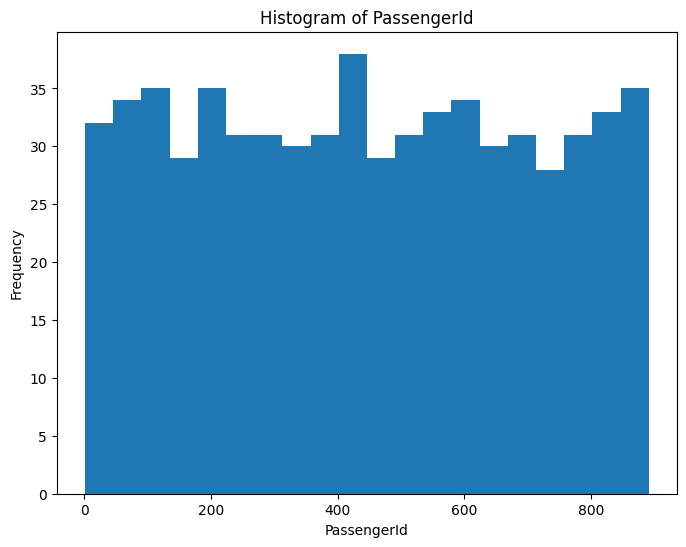

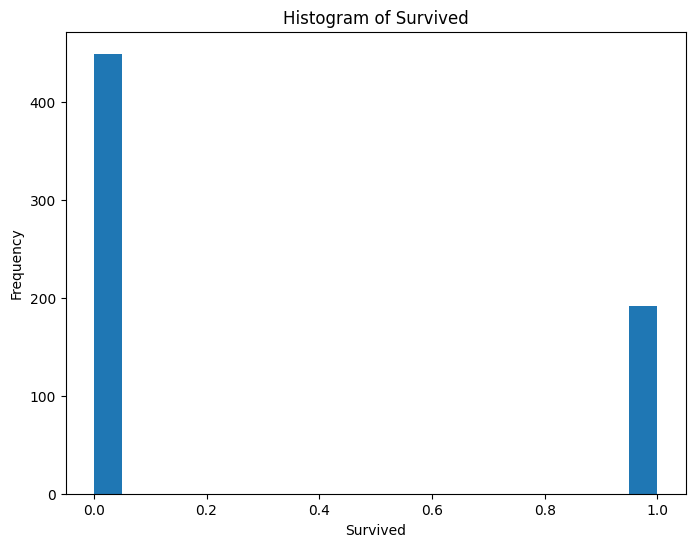

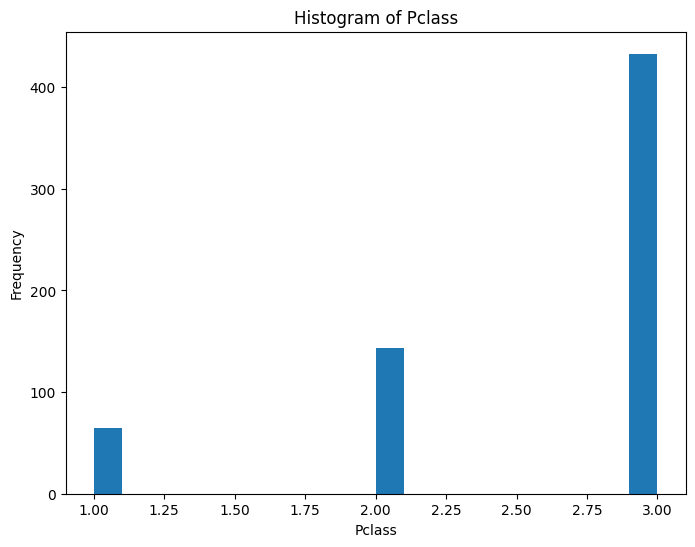

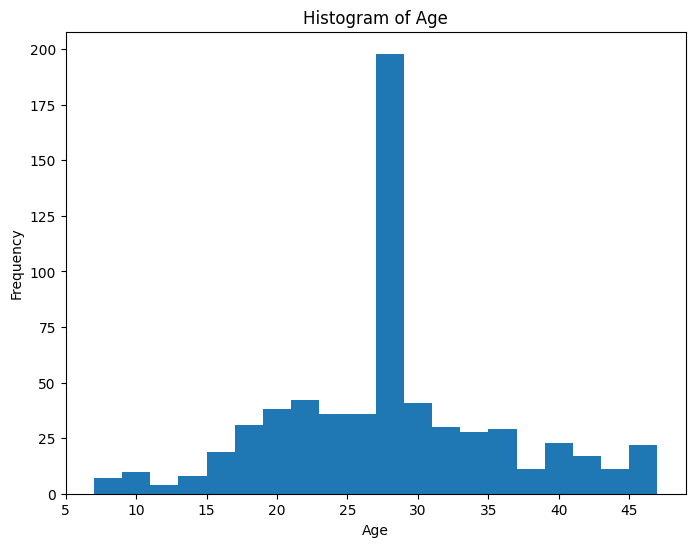

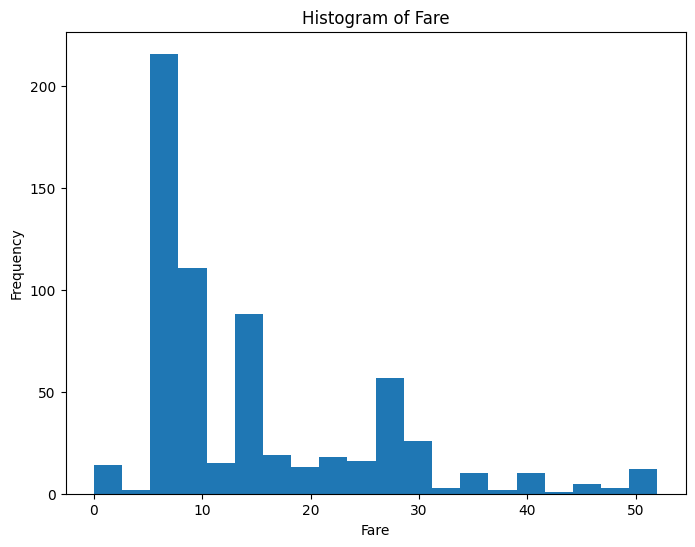

In [30]:
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame with the cleaned data

# Iterate through numerical columns and plot histograms
for column in df.select_dtypes(include=['number']):
  plt.figure(figsize=(8, 6))
  plt.hist(df[column], bins=20)  # You can adjust the number of bins
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {column}')
  plt.show()


**DATA PREPROCESSING**

In [31]:
!pip install pandas
!pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1. Load the dataset
# The original code was loading the 'gender_submission.csv', which likely only contains 'PassengerId' and 'Survived'.
# Change it to load the dataset containing the 'Age', 'Embarked', 'Sex', 'Fare' columns.
df = pd.read_csv('train.csv') # Assuming 'train.csv' contains the necessary columns. If not, replace with the correct file name.

# 2. Handle missing values
# a. Remove rows with missing values (use with caution)
df.dropna(inplace=True)
# b. Impute missing values (e.g., with mean, median, or mode)
df['Age'].fillna(df['Age'].mean(), inplace=True)

# 3. Encode categorical features
# a. One-hot encoding for nominal features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for better compatibility
encoded_features = encoder.fit_transform(df[['Embarked', 'Sex']])  # Replace with your categorical columns
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Embarked', 'Sex']))
df = pd.concat([df, encoded_df], axis=1)
df.drop(['Embarked', 'Sex'], axis=1, inplace=True)  # Remove original categorical columns

# 4. Feature scaling (if needed for algorithms like k-NN or SVM)
scaler = StandardScaler()
numerical_features = ['Age', 'Fare']  # Replace with your numerical columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# 5. Split data into training and testing sets
X = df.drop('Survived', axis=1)  # Assuming 'Survived' is your target column
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Now you have preprocessed data ready for modeling!

**PCA**

In [32]:
!pip install pandas
!pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer # Import SimpleImputer for imputation


# 1. Load the dataset
df = pd.read_csv('train.csv')

# 2. Handle missing values
# Instead of dropping rows, impute missing values for all numerical features
numerical_features = ['Age', 'Fare']  # Define numerical features
imputer = SimpleImputer(strategy='mean')  # Create an imputer object
df[numerical_features] = imputer.fit_transform(df[numerical_features])  # Impute missing values

# 3. Encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Reset index to avoid potential issues during concatenation
encoded_features = encoder.fit_transform(df[['Embarked', 'Sex']].reset_index(drop=True))
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Embarked', 'Sex']))
# Reset index before concatenation to ensure alignment
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
df.drop(['Embarked', 'Sex'], axis=1, inplace=True)

# 4. Feature scaling
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# 5. Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[numerical_features])
principal_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
df = pd.concat([df, principal_df], axis=1)
df.drop(numerical_features, axis=1, inplace=True)

# 6. Split data into training and testing sets
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
!pip install pandas
!pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# ... (Previous code for data loading, preprocessing, and PCA) ...

# 6. Split data into training and testing sets
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)  # Drop irrelevant or problematic columns like 'Name', 'Ticket', and 'Cabin'
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Build and train a Logistic Regression model
model = LogisticRegression(random_state=42)  # Create a Logistic Regression model
model.fit(X_train, y_train)  # Train the model using the training data

# 8. Make predictions on the test set
y_pred = model.predict(X_test)  # Predict target values for the test set

# 9. Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
print(f"Accuracy: {accuracy:.2f}")  # Print the accuracy

# Print a classification report with precision, recall, F1-score, etc.
print(classification_report(y_test, y_pred))


Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



**Model Training & Model Testing**




In [34]:
!pip install pandas
!pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# 1. Load the dataset
df = pd.read_csv('train.csv')

# 2. Handle missing values
numerical_features = ['Age', 'Fare']
imputer = SimpleImputer(strategy='mean')
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# 3. Encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[['Embarked', 'Sex']].reset_index(drop=True))
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Embarked', 'Sex']))
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
df.drop(['Embarked', 'Sex'], axis=1, inplace=True)

# 4. Feature scaling
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# 5. Apply PCA (optional, you can comment this out if not needed)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[numerical_features])
principal_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
df = pd.concat([df, principal_df], axis=1)
df.drop(numerical_features, axis=1, inplace=True)

# 6. Split data into training and testing sets
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)  # Drop irrelevant columns
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Model Training: Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 8. Model Testing: Predictions
y_pred = model.predict(X_test)


In [35]:
!pip install pandas
!pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


# ... (Your existing code for data loading, preprocessing, and model training) ...

# 8. Model Testing: Predictions
y_pred = model.predict(X_test)

# 9. Accuracy Checking and Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate ROC AUC score (for binary classification)
roc_auc = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", roc_auc)

Accuracy: 0.7932960893854749

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


Confusion Matrix:
[[89 16]
 [21 53]]

ROC AUC Score: 0.781917631917632


**Classification Report / Cost (Prediction)**

In [36]:
# Classification Report and Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


Accuracy: 0.7932960893854749
